<a href="https://colab.research.google.com/github/Quang-Trong-Tan-Loc/AI/blob/main/BT5_power_rice_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 33.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=194966717e1e5116e27ab274fba058ceeb3b67c6d3edb1d6a6023373100126db
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

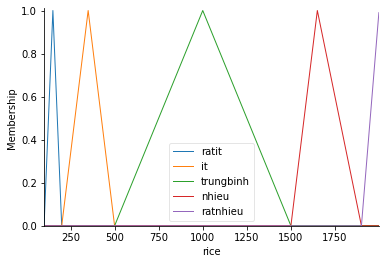

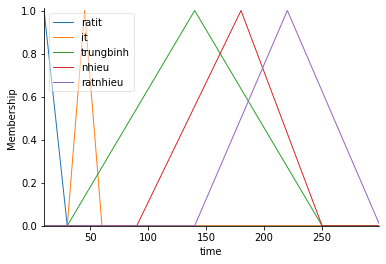

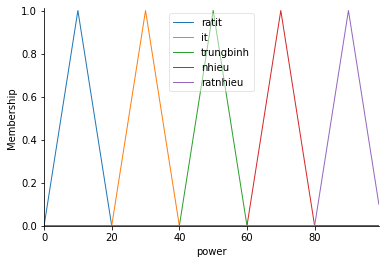

In [21]:
from skfuzzy.control.fuzzyvariable import trimf
rice = ctrl.Antecedent(np.arange(100, 2000 ,1), 'rice')
time = ctrl.Antecedent(np.arange(10 ,300, 1), 'time')
power = ctrl.Consequent(np.arange(0, 100, 1), 'power')
rice['ratit']= fuzz.trimf(rice.universe, [100 ,150, 200])
rice['it'] = fuzz.trimf(rice.universe, [200, 350, 500])
rice['trungbinh'] = fuzz.trimf(rice.universe, [500, 1000, 1500])
rice['nhieu'] = fuzz.trimf(rice.universe, [1500, 1650, 1900])
rice['ratnhieu'] = fuzz.trimf(rice.universe, [1900, 2000, 2000])

time['ratit']= fuzz.trimf(time.universe, [10 ,10, 30])
time['it'] = fuzz.trimf(time.universe, [30, 45, 60])
time['trungbinh'] = fuzz.trimf(time.universe, [30, 140, 250])
time['nhieu']= fuzz.trimf(time.universe, [90 , 180, 250])
time['ratnhieu'] = fuzz.trimf(time.universe, [140, 220, 300])


power['ratit'] = fuzz.trimf(power.universe, [0, 10, 20])
power['it'] = fuzz.trimf(power.universe, [20,30,40])
power['trungbinh'] = fuzz.trimf(power.universe, [40,50,60])
power['nhieu'] = fuzz.trimf(power.universe, [60,70,80])
power['ratnhieu'] = fuzz.trimf(power.universe, [80,90,100])


rice.view()
time.view()
power.view()

In [24]:
rule1 = ctrl.Rule(rice['ratit'] & time['ratit'], power['nhieu'])
rule2 = ctrl.Rule(rice['ratit'] & time['it'], power['trungbinh'])
rule3 = ctrl.Rule(rice['ratit'] & time['trungbinh'], power['trungbinh'])
rule4 = ctrl.Rule(rice['ratit'] & time['nhieu'], power['it'])
rule5 = ctrl.Rule(rice['ratit'] & time['ratnhieu'], power['ratit'])

rule6 = ctrl.Rule(rice['it'] & time['ratit'], power['nhieu'])
rule7 = ctrl.Rule(rice['it'] & time['it'], power['nhieu'])
rule8 = ctrl.Rule(rice['it'] & time['trungbinh'], power['trungbinh'])
rule9 = ctrl.Rule(rice['it'] & time['nhieu'], power['it'])
rule10 = ctrl.Rule(rice['it'] & time['ratnhieu'], power['ratit'])

rule11 = ctrl.Rule(rice['trungbinh'] & time['ratit'], power['nhieu'])
rule12 = ctrl.Rule(rice['trungbinh'] & time['it'], power['nhieu'])
rule13 = ctrl.Rule(rice['trungbinh'] & time['trungbinh'], power['trungbinh'])
rule14 = ctrl.Rule(rice['trungbinh'] & time['nhieu'], power['trungbinh'])
rule15 = ctrl.Rule(rice['trungbinh'] & time['ratnhieu'], power['it'])

rule16 = ctrl.Rule(rice['nhieu'] & time['ratit'], power['ratnhieu'])
rule17 = ctrl.Rule(rice['nhieu'] & time['it'], power['nhieu'])
rule18 = ctrl.Rule(rice['nhieu'] & time['trungbinh'], power['trungbinh'])
rule19 = ctrl.Rule(rice['nhieu'] & time['nhieu'], power['trungbinh'])
rule20 = ctrl.Rule(rice['nhieu'] & time['ratnhieu'], power['it'])

rule21 = ctrl.Rule(rice['ratnhieu'] & time['ratit'], power['ratnhieu'])
rule22 = ctrl.Rule(rice['ratnhieu'] & time['it'], power['ratnhieu'])
rule23 = ctrl.Rule(rice['ratnhieu'] & time['trungbinh'], power['trungbinh'])
rule24 = ctrl.Rule(rice['ratnhieu'] & time['nhieu'], power['it'])
rule25 = ctrl.Rule(rice['ratnhieu'] & time['ratnhieu'], power['ratit'])



9.999999999999996


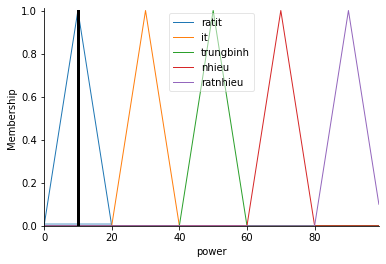

In [31]:
power_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
power1=ctrl.ControlSystemSimulation(power_ctrl)
power1.input['time']= 300
power1.input['rice']= 2000
power1.compute()
print(power1.output['power'])
power.view(sim=power1)